# **YOLOv11 Training on Custom Dataset**

## **1. Install and Import Dependencies**
Install the required libraries and import necessary modules:
- **ultralytics**: A library to work with YOLOv11 for model training and inference.
- **PyTorch**: The deep learning framework powering YOLOv11 under the hood.


In [2]:
!pip install ultralytics
!pip install --upgrade sympy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 898.5/898.5 kB 17.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 52.8 MB/s eta 0:00:00
  Attempting uninstall: sympy
    Found existing installation: sympy 1.13.1
    Uninstalling sympy-1.13.1:
      Successfully uninstalled sympy-1.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.5.1+cu121 requires sympy==1.13.1; python_version >= "3.9", but you have sympy 1.13.3 which is incompatible.


## **2. Set Up Dataset Paths**
Set the paths to your training and validation datasets:
- **Purpose**: YOLOv8 needs structured folders for images and annotations to learn effectively.


In [3]:
from ultralytics import YOLO
import os

# Set the path to your dataset
dataset_path = "/content/drive/MyDrive/sidewalkDetection"  # Update to match your dataset location

# Define the paths for train and valid images and labels
train_images = os.path.join(dataset_path, 'train/images')
train_labels = os.path.join(dataset_path, 'train/labels')
valid_images = os.path.join(dataset_path, 'valid/images')
valid_labels = os.path.join(dataset_path, 'valid/labels')

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


## **3. Create `data.yaml` File**
Define the dataset configuration file:
- **Purpose**: YOLOv11 uses the `data.yaml` file to specify dataset paths, the number of classes, and class names.



In [4]:
number_of_classes = 1  # Update this with the actual number of classes in your dataset
class_names = ['damage']  # Update with your actual class names

data_yaml_path = '/content/drive/MyDrive/sidewalkDetection/data.yaml'

# Create and write to the data.yaml file
yaml_content = f"""train: {train_images}
val: {valid_images}
nc: {number_of_classes}
names: {class_names}
"""

# Write the YAML content to the file
with open(data_yaml_path, 'w') as f:
    f.write(yaml_content)

print(f"data.yaml file created at: {data_yaml_path}")

data.yaml file created at: /content/drive/MyDrive/sidewalkDetection/data.yaml



## **4. Load YOLOv11n Pretrained Mode and Train YOLOv11n**
Initialize a pretrained YOLOv8 model:
- **YOLOv8**: Leverages transfer learning using pretrained weights to improve training efficiency.
- **PyTorch**: Utilized to load, manage, and fine-tune the neural network model.

Train YOLOv8 on your custom dataset:

Purpose: Adjust the model weights to recognize objects specific to your dataset.
YOLOv8: Uses PyTorch's training loop for optimization and backpropagation.

In [5]:
# Load YOLOv8 pre-trained model
model = YOLO('yolo11n.pt')  # Options: yolo11n.pt, yolo11s.pt, yolo11m.pt, yolo11l.pt, yolo11x.pt

# Train the model on your custom dataset
model.train(
    data=data_yaml_path,  # Path to your data.yaml file
    epochs=200,  # Adjust the number of epochs as necessary
    batch=16,   # Adjust the batch size as necessary
    imgsz=640,  # Resize the input images to 640px (adjust if needed)
    save=True   # Save model checkpoints after each epoch=-0p-[=09876`1]
)

100%|██████████| 5.35M/5.35M [00:00<00:00, 66.0MB/s]


Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/drive/MyDrive/sidewalkDetection/data.yaml, epochs=200, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_l

100%|██████████| 755k/755k [00:00<00:00, 14.1MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/drive/MyDrive/sidewalkDetection/train/labels.cache... 446 images, 317 backgrounds, 0 corrupt: 100%|██████████| 446/446 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.21 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/drive/MyDrive/sidewalkDetection/valid/labels.cache... 56 images, 40 backgrounds, 0 corrupt: 100%|██████████| 56/56 [00:00<?, ?it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train
Starting training for 200 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/200      2.56G      2.293      7.651      1.907          5        640: 100%|██████████| 28/28 [00:05<00:00,  4.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.19it/s]

                   all         56         23   0.000952      0.696     0.0711    0.00898



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/200       2.6G      2.189      5.858      1.862         16        640: 100%|██████████| 28/28 [00:03<00:00,  7.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.36it/s]

                   all         56         23   0.000952      0.696     0.0204     0.0057



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/200      2.58G      2.272      8.639      1.952         13        640: 100%|██████████| 28/28 [00:03<00:00,  8.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.65it/s]

                   all         56         23    0.00996     0.0435    0.00329    0.00116



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/200      2.58G       2.41      5.767      2.109         12        640: 100%|██████████| 28/28 [00:03<00:00,  8.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.34it/s]

                   all         56         23      0.066     0.0435     0.0095      0.004



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/200      2.58G      2.497      5.038      2.208          5        640: 100%|██████████| 28/28 [00:03<00:00,  8.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.03it/s]

                   all         56         23      0.258      0.211     0.0977     0.0284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/200      2.58G      2.414      4.289      2.115          5        640: 100%|██████████| 28/28 [00:03<00:00,  8.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.96it/s]

                   all         56         23        0.2       0.13     0.0754     0.0241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/200      2.58G       2.28      3.843      2.095         10        640: 100%|██████████| 28/28 [00:03<00:00,  8.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.96it/s]

                   all         56         23      0.294      0.261      0.236     0.0904



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/200      2.58G      2.296      3.452      2.098          6        640: 100%|██████████| 28/28 [00:03<00:00,  8.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.57it/s]

                   all         56         23      0.106     0.0435     0.0121    0.00464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/200      2.58G      2.308      3.237       2.08          4        640: 100%|██████████| 28/28 [00:03<00:00,  8.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.20it/s]


                   all         56         23      0.303      0.261      0.156     0.0663

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/200      2.58G       2.39      3.249      2.138         19        640: 100%|██████████| 28/28 [00:03<00:00,  8.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.34it/s]

                   all         56         23      0.442      0.174      0.205     0.0743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/200      2.58G      2.318      3.029      2.136          8        640: 100%|██████████| 28/28 [00:03<00:00,  8.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.22it/s]

                   all         56         23       0.72      0.217       0.26     0.0808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/200      2.58G      2.278      2.942      2.102         10        640: 100%|██████████| 28/28 [00:03<00:00,  8.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.78it/s]

                   all         56         23      0.796      0.217      0.276      0.109



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/200      2.58G      2.175      2.686       1.96          9        640: 100%|██████████| 28/28 [00:03<00:00,  9.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.67it/s]


                   all         56         23      0.302       0.13     0.0911     0.0376

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/200      2.58G      2.296      2.783      2.083         10        640: 100%|██████████| 28/28 [00:03<00:00,  8.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.60it/s]

                   all         56         23      0.243      0.348      0.187     0.0592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/200      2.58G      2.151      2.579       1.99         13        640: 100%|██████████| 28/28 [00:03<00:00,  8.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.77it/s]

                   all         56         23      0.542      0.412      0.403      0.158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/200      2.58G      2.208      2.623      1.988          6        640: 100%|██████████| 28/28 [00:03<00:00,  8.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.78it/s]

                   all         56         23      0.255      0.391      0.236     0.0775



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/200      2.58G      2.198      2.687      2.009          3        640: 100%|██████████| 28/28 [00:03<00:00,  8.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.06it/s]

                   all         56         23      0.508      0.435      0.395      0.143



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/200      2.58G      2.177      2.503      2.062          6        640: 100%|██████████| 28/28 [00:03<00:00,  8.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.31it/s]

                   all         56         23      0.348      0.435      0.303      0.113



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/200      2.58G        2.1      2.443      1.916          5        640: 100%|██████████| 28/28 [00:03<00:00,  8.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.40it/s]

                   all         56         23      0.396      0.391      0.324      0.146



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/200      2.58G      2.164      2.449      1.939          9        640: 100%|██████████| 28/28 [00:03<00:00,  8.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.82it/s]

                   all         56         23      0.479      0.478      0.397      0.144



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/200      2.58G      2.075      2.319        1.9          5        640: 100%|██████████| 28/28 [00:03<00:00,  8.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.24it/s]


                   all         56         23      0.588       0.31      0.385      0.159

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/200      2.58G       2.24      2.475      2.063          6        640: 100%|██████████| 28/28 [00:03<00:00,  8.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.55it/s]

                   all         56         23      0.443      0.348      0.318      0.116



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/200      2.58G      1.971      2.255        1.9          7        640: 100%|██████████| 28/28 [00:03<00:00,  8.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.68it/s]

                   all         56         23      0.402      0.439      0.391      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/200      2.58G      2.056      2.379      1.936          8        640: 100%|██████████| 28/28 [00:03<00:00,  8.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.79it/s]

                   all         56         23      0.385      0.348       0.36      0.166



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/200      2.58G      1.966      2.288      1.892         11        640: 100%|██████████| 28/28 [00:03<00:00,  8.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.10it/s]

                   all         56         23      0.517      0.522      0.447       0.14



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/200      2.58G      2.168      2.449      2.012         10        640: 100%|██████████| 28/28 [00:03<00:00,  8.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.65it/s]

                   all         56         23      0.611      0.304      0.356      0.159



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/200      2.58G      2.021      2.058      1.909         15        640: 100%|██████████| 28/28 [00:03<00:00,  8.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.06it/s]

                   all         56         23      0.504      0.309      0.401      0.155



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/200      2.58G      2.096      2.234      1.928         14        640: 100%|██████████| 28/28 [00:03<00:00,  8.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.04it/s]


                   all         56         23      0.432      0.391      0.392      0.149

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/200      2.58G      2.025       2.26       1.94          4        640: 100%|██████████| 28/28 [00:03<00:00,  8.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.57it/s]

                   all         56         23      0.481      0.348      0.407      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/200      2.58G      1.974      2.339      1.869          5        640: 100%|██████████| 28/28 [00:03<00:00,  8.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.98it/s]

                   all         56         23       0.58      0.435      0.458      0.177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/200      2.58G      2.019      2.135      1.868          9        640: 100%|██████████| 28/28 [00:03<00:00,  8.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.36it/s]

                   all         56         23      0.422      0.509      0.443      0.198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/200      2.59G          2      2.228      1.861          7        640: 100%|██████████| 28/28 [00:03<00:00,  8.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.66it/s]

                   all         56         23       0.69      0.261      0.361      0.176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/200      2.58G      1.941       2.05      1.845         13        640: 100%|██████████| 28/28 [00:03<00:00,  8.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.40it/s]

                   all         56         23      0.422      0.435      0.422      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/200      2.58G      1.923       1.93      1.832         14        640: 100%|██████████| 28/28 [00:03<00:00,  8.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.13it/s]


                   all         56         23        0.5      0.478      0.387      0.151

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/200      2.58G      1.966       2.13      1.865          9        640: 100%|██████████| 28/28 [00:03<00:00,  8.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.28it/s]

                   all         56         23      0.408      0.601       0.46      0.213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/200      2.58G      2.013      2.152      1.883         14        640: 100%|██████████| 28/28 [00:03<00:00,  8.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.58it/s]

                   all         56         23      0.517      0.348      0.423      0.186



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/200      2.58G      1.927      1.936      1.837         14        640: 100%|██████████| 28/28 [00:03<00:00,  8.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.28it/s]


                   all         56         23      0.703      0.515      0.538      0.197

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/200      2.58G          2      2.095      1.845          9        640: 100%|██████████| 28/28 [00:03<00:00,  8.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.02it/s]

                   all         56         23      0.538      0.556      0.535      0.173



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/200      2.58G      1.917      1.951      1.842          5        640: 100%|██████████| 28/28 [00:03<00:00,  8.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.59it/s]

                   all         56         23      0.754      0.565      0.592      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/200      2.58G      1.863      1.982       1.84         10        640: 100%|██████████| 28/28 [00:03<00:00,  8.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.17it/s]

                   all         56         23      0.584      0.522      0.481      0.198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/200      2.58G      1.922      1.999      1.798          8        640: 100%|██████████| 28/28 [00:03<00:00,  8.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.13it/s]

                   all         56         23      0.922      0.512      0.592      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/200      2.58G      1.866       1.97      1.815          5        640: 100%|██████████| 28/28 [00:03<00:00,  8.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.21it/s]

                   all         56         23      0.667      0.391      0.456      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/200      2.58G      1.858      2.129      1.831         11        640: 100%|██████████| 28/28 [00:03<00:00,  8.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.84it/s]

                   all         56         23      0.993      0.565      0.651      0.221



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/200      2.58G       1.85      1.816      1.783          6        640: 100%|██████████| 28/28 [00:03<00:00,  8.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.33it/s]


                   all         56         23      0.415      0.522      0.438      0.195

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/200      2.58G      1.909      1.979       1.79         11        640: 100%|██████████| 28/28 [00:03<00:00,  9.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.55it/s]


                   all         56         23      0.537      0.505        0.4      0.149

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/200      2.58G      1.854      1.874      1.757          8        640: 100%|██████████| 28/28 [00:03<00:00,  8.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.72it/s]

                   all         56         23      0.598      0.519      0.503      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/200      2.58G      1.932      1.966      1.809         13        640: 100%|██████████| 28/28 [00:03<00:00,  8.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.95it/s]

                   all         56         23      0.772      0.609      0.639      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/200      2.58G      1.878      1.951      1.805         11        640: 100%|██████████| 28/28 [00:03<00:00,  8.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.09it/s]

                   all         56         23       0.79       0.49      0.598      0.226



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/200      2.58G      1.771      1.728       1.71          5        640: 100%|██████████| 28/28 [00:03<00:00,  9.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.03it/s]

                   all         56         23       0.66      0.592      0.567       0.22



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/200      2.58G      1.848      1.783       1.71          7        640: 100%|██████████| 28/28 [00:03<00:00,  8.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.18it/s]


                   all         56         23      0.453      0.522      0.544      0.215

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/200      2.58G      1.727      1.779       1.69          4        640: 100%|██████████| 28/28 [00:03<00:00,  8.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.53it/s]

                   all         56         23      0.431      0.652      0.537      0.225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/200      2.58G      1.847      1.815      1.806          5        640: 100%|██████████| 28/28 [00:03<00:00,  8.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.34it/s]


                   all         56         23      0.515      0.652      0.581      0.215

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/200      2.58G      1.925      1.912      1.839          7        640: 100%|██████████| 28/28 [00:03<00:00,  8.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.31it/s]

                   all         56         23      0.824      0.565      0.601      0.257



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/200      2.58G      1.925      1.883      1.776         13        640: 100%|██████████| 28/28 [00:03<00:00,  8.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.70it/s]

                   all         56         23      0.406      0.446      0.399      0.112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/200      2.58G       1.84      1.732      1.767         16        640: 100%|██████████| 28/28 [00:03<00:00,  8.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.40it/s]

                   all         56         23      0.583      0.609       0.53      0.236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/200      2.58G      1.856        1.7       1.77          9        640: 100%|██████████| 28/28 [00:03<00:00,  8.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.53it/s]


                   all         56         23       0.67      0.522      0.574      0.241

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/200      2.58G      1.787       1.84      1.735          5        640: 100%|██████████| 28/28 [00:03<00:00,  8.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.54it/s]


                   all         56         23      0.698      0.503      0.515       0.21

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/200      2.58G      1.914      1.831      1.733         16        640: 100%|██████████| 28/28 [00:03<00:00,  8.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.58it/s]

                   all         56         23      0.555      0.478      0.486      0.185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/200      2.58G      1.941      1.993      1.863         11        640: 100%|██████████| 28/28 [00:03<00:00,  8.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.99it/s]

                   all         56         23      0.763      0.348      0.459       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/200      2.58G       1.96      1.959      1.793          2        640: 100%|██████████| 28/28 [00:03<00:00,  8.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.24it/s]

                   all         56         23      0.513      0.367      0.412      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/200      2.58G      1.848      1.737      1.711          2        640: 100%|██████████| 28/28 [00:03<00:00,  8.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.21it/s]

                   all         56         23      0.397      0.261      0.249      0.109



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/200      2.58G      1.816      1.729      1.686         12        640: 100%|██████████| 28/28 [00:03<00:00,  8.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.86it/s]

                   all         56         23      0.639       0.54      0.539      0.223



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/200      2.58G      1.761      1.593      1.685         14        640: 100%|██████████| 28/28 [00:03<00:00,  8.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.70it/s]

                   all         56         23      0.512      0.593      0.512      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/200      2.58G      1.756      1.728      1.725          9        640: 100%|██████████| 28/28 [00:03<00:00,  8.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.73it/s]


                   all         56         23      0.584      0.522      0.615      0.267

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/200      2.58G       1.81      1.699      1.754          8        640: 100%|██████████| 28/28 [00:03<00:00,  8.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.54it/s]


                   all         56         23       0.62      0.478      0.508       0.22

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/200      2.58G      1.794      1.618      1.657         10        640: 100%|██████████| 28/28 [00:03<00:00,  8.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.08it/s]

                   all         56         23      0.549      0.522      0.581      0.231



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/200      2.58G      1.836      1.817      1.726         11        640: 100%|██████████| 28/28 [00:03<00:00,  8.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.71it/s]

                   all         56         23      0.634      0.602      0.602      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/200      2.58G      1.742      1.596      1.633         10        640: 100%|██████████| 28/28 [00:03<00:00,  8.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.70it/s]

                   all         56         23      0.864      0.552      0.623      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/200      2.58G      1.717      1.593      1.725          7        640: 100%|██████████| 28/28 [00:03<00:00,  8.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.72it/s]

                   all         56         23      0.833      0.391      0.489      0.203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/200      2.58G      1.825      1.673      1.695         10        640: 100%|██████████| 28/28 [00:03<00:00,  9.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.07it/s]

                   all         56         23      0.607      0.565      0.546      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/200      2.58G      1.801      1.682      1.793          6        640: 100%|██████████| 28/28 [00:03<00:00,  8.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.64it/s]

                   all         56         23      0.881      0.522      0.626       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/200      2.58G      1.681      1.547      1.608          9        640: 100%|██████████| 28/28 [00:03<00:00,  8.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.31it/s]


                   all         56         23      0.805      0.435      0.579      0.218

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/200      2.58G      1.718      1.621      1.678         11        640: 100%|██████████| 28/28 [00:03<00:00,  8.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.33it/s]


                   all         56         23      0.623      0.431      0.454      0.169

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/200      2.58G      1.686      1.782      1.723          3        640: 100%|██████████| 28/28 [00:03<00:00,  8.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.70it/s]


                   all         56         23      0.555      0.478      0.512      0.206

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/200      2.58G      1.753      1.606      1.714          8        640: 100%|██████████| 28/28 [00:03<00:00,  8.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.88it/s]

                   all         56         23       0.68      0.609      0.626       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/200      2.58G      1.753       1.56      1.605         10        640: 100%|██████████| 28/28 [00:03<00:00,  8.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.11it/s]

                   all         56         23      0.735      0.482      0.645      0.283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/200      2.58G      1.744      1.551      1.663         14        640: 100%|██████████| 28/28 [00:03<00:00,  8.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.96it/s]

                   all         56         23      0.948      0.478      0.585      0.259



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/200      2.58G       1.87      1.618      1.669         10        640: 100%|██████████| 28/28 [00:03<00:00,  8.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.95it/s]

                   all         56         23      0.598      0.565      0.613      0.236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/200      2.58G      1.675      1.477       1.65          9        640: 100%|██████████| 28/28 [00:03<00:00,  8.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.32it/s]

                   all         56         23      0.836      0.391      0.571      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/200      2.58G      1.788      1.641      1.708         17        640: 100%|██████████| 28/28 [00:03<00:00,  8.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.98it/s]

                   all         56         23       0.85      0.435      0.536      0.216



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/200      2.58G      1.731      1.726       1.62         10        640: 100%|██████████| 28/28 [00:03<00:00,  8.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.85it/s]


                   all         56         23      0.468      0.522      0.482       0.22

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/200      2.58G      1.686      1.491      1.636         10        640: 100%|██████████| 28/28 [00:03<00:00,  8.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.27it/s]


                   all         56         23      0.696      0.565      0.606      0.231

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/200      2.58G      1.825      1.558      1.668          7        640: 100%|██████████| 28/28 [00:03<00:00,  8.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.82it/s]


                   all         56         23      0.742      0.565      0.579      0.211

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/200      2.58G      1.646      1.493      1.587          9        640: 100%|██████████| 28/28 [00:03<00:00,  8.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.41it/s]


                   all         56         23      0.784      0.478      0.582      0.266

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/200      2.58G      1.595      1.406      1.572         12        640: 100%|██████████| 28/28 [00:03<00:00,  8.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.48it/s]


                   all         56         23      0.797      0.511      0.599      0.243

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/200      2.58G      1.622      1.353      1.595          7        640: 100%|██████████| 28/28 [00:03<00:00,  8.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.18it/s]

                   all         56         23      0.626      0.609      0.644      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/200      2.58G      1.621      1.295      1.565          4        640: 100%|██████████| 28/28 [00:03<00:00,  8.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.04it/s]

                   all         56         23       0.85      0.478      0.607      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/200      2.58G      1.654        1.4      1.615         11        640: 100%|██████████| 28/28 [00:03<00:00,  8.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.98it/s]

                   all         56         23      0.918      0.565      0.711      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/200      2.58G      1.738      1.525      1.665         12        640: 100%|██████████| 28/28 [00:03<00:00,  8.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.03it/s]

                   all         56         23      0.739      0.652      0.674      0.251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/200      2.58G      1.746      1.404      1.666         14        640: 100%|██████████| 28/28 [00:03<00:00,  8.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.27it/s]

                   all         56         23      0.798      0.435      0.555      0.206



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/200      2.58G       1.64      1.514      1.619          4        640: 100%|██████████| 28/28 [00:03<00:00,  8.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.65it/s]

                   all         56         23      0.801      0.391      0.523      0.199



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/200      2.58G      1.571      1.397      1.608          8        640: 100%|██████████| 28/28 [00:03<00:00,  8.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.93it/s]

                   all         56         23      0.679      0.391      0.465      0.156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/200      2.58G      1.619      1.431      1.545         11        640: 100%|██████████| 28/28 [00:03<00:00,  8.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.89it/s]

                   all         56         23      0.607      0.471      0.495      0.175



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/200      2.58G      1.735      1.473      1.618          4        640: 100%|██████████| 28/28 [00:03<00:00,  8.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.11it/s]

                   all         56         23      0.743      0.478       0.56      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/200      2.58G      1.618      1.423      1.613          9        640: 100%|██████████| 28/28 [00:03<00:00,  8.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.64it/s]

                   all         56         23      0.657      0.565       0.59      0.203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/200      2.58G      1.575      1.369      1.582          5        640: 100%|██████████| 28/28 [00:03<00:00,  8.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.55it/s]

                   all         56         23      0.639      0.692      0.621      0.234



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/200      2.58G      1.664      1.511      1.639          5        640: 100%|██████████| 28/28 [00:03<00:00,  8.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.64it/s]

                   all         56         23      0.754      0.739      0.716      0.264



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/200      2.58G      1.647      1.515      1.564         11        640: 100%|██████████| 28/28 [00:03<00:00,  8.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.79it/s]

                   all         56         23      0.505      0.609      0.549      0.223



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/200      2.58G      1.662      1.337       1.57          8        640: 100%|██████████| 28/28 [00:03<00:00,  8.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.48it/s]

                   all         56         23      0.761      0.435      0.519      0.205



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/200      2.58G       1.63        1.4      1.614          8        640: 100%|██████████| 28/28 [00:03<00:00,  8.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.25it/s]

                   all         56         23       0.89      0.565      0.666      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/200      2.58G      1.683       1.45      1.592         15        640: 100%|██████████| 28/28 [00:03<00:00,  8.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.38it/s]

                   all         56         23      0.982      0.478      0.601      0.246



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/200      2.58G      1.627      1.496      1.566          1        640: 100%|██████████| 28/28 [00:03<00:00,  8.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.64it/s]

                   all         56         23      0.908      0.478      0.657      0.256



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/200      2.58G      1.647      1.361      1.581          9        640: 100%|██████████| 28/28 [00:03<00:00,  9.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.72it/s]

                   all         56         23          1      0.518      0.678      0.257



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/200      2.58G      1.541      1.278       1.54          6        640: 100%|██████████| 28/28 [00:03<00:00,  8.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.82it/s]

                   all         56         23      0.812      0.565      0.693      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/200      2.58G      1.695      1.431      1.579          7        640: 100%|██████████| 28/28 [00:03<00:00,  8.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.08it/s]

                   all         56         23      0.774      0.595      0.683      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/200      2.58G      1.593      1.439      1.551          9        640: 100%|██████████| 28/28 [00:03<00:00,  9.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.57it/s]

                   all         56         23      0.649      0.482      0.594      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/200      2.58G      1.658      1.441      1.592          7        640: 100%|██████████| 28/28 [00:03<00:00,  8.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.74it/s]

                   all         56         23      0.646      0.435      0.525      0.205



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/200      2.58G      1.517       1.32      1.505          4        640: 100%|██████████| 28/28 [00:03<00:00,  8.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.45it/s]

                   all         56         23      0.603      0.565      0.563      0.198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/200      2.58G       1.68      1.436      1.652          8        640: 100%|██████████| 28/28 [00:03<00:00,  8.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.10it/s]

                   all         56         23      0.562      0.613      0.555      0.212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/200      2.58G      1.609      1.326      1.534         10        640: 100%|██████████| 28/28 [00:03<00:00,  8.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.60it/s]

                   all         56         23       0.74      0.696      0.759      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/200      2.58G      1.557      1.328      1.561         11        640: 100%|██████████| 28/28 [00:03<00:00,  8.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.53it/s]

                   all         56         23      0.702      0.609      0.633      0.223



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/200      2.58G      1.492      1.202      1.484          8        640: 100%|██████████| 28/28 [00:03<00:00,  8.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.77it/s]

                   all         56         23      0.686       0.57      0.633      0.256



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/200      2.58G      1.618      1.431      1.549          8        640: 100%|██████████| 28/28 [00:03<00:00,  8.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.78it/s]

                   all         56         23      0.864      0.435      0.571      0.226



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/200      2.58G      1.533       1.24      1.538         11        640: 100%|██████████| 28/28 [00:03<00:00,  8.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.06it/s]

                   all         56         23       0.76      0.696      0.692      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/200      2.58G       1.49      1.312      1.501          7        640: 100%|██████████| 28/28 [00:03<00:00,  8.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.76it/s]

                   all         56         23      0.709      0.565      0.587      0.218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/200      2.58G      1.487      1.242      1.461         10        640: 100%|██████████| 28/28 [00:03<00:00,  8.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.54it/s]

                   all         56         23      0.709      0.739      0.681      0.234



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/200      2.58G      1.534      1.287      1.534         12        640: 100%|██████████| 28/28 [00:03<00:00,  8.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.87it/s]

                   all         56         23      0.727      0.565      0.606      0.229



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/200      2.58G      1.588       1.38      1.576         10        640: 100%|██████████| 28/28 [00:03<00:00,  8.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.21it/s]


                   all         56         23      0.629      0.591      0.623      0.263

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/200      2.58G      1.527      1.353      1.572          8        640: 100%|██████████| 28/28 [00:03<00:00,  8.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.55it/s]

                   all         56         23      0.834      0.435      0.551      0.213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/200      2.58G      1.581      1.368      1.538         13        640: 100%|██████████| 28/28 [00:03<00:00,  8.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.66it/s]

                   all         56         23      0.408      0.565      0.488      0.172



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/200      2.58G       1.49      1.266      1.482         10        640: 100%|██████████| 28/28 [00:03<00:00,  8.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.62it/s]

                   all         56         23      0.662      0.609      0.616       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/200      2.58G      1.507      1.202      1.492          7        640: 100%|██████████| 28/28 [00:03<00:00,  8.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.45it/s]

                   all         56         23      0.599      0.609      0.572      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/200      2.58G      1.446      1.278      1.466          9        640: 100%|██████████| 28/28 [00:03<00:00,  8.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.79it/s]

                   all         56         23      0.631      0.478      0.548      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/200      2.58G      1.499      1.245      1.521         12        640: 100%|██████████| 28/28 [00:03<00:00,  8.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.95it/s]

                   all         56         23      0.754      0.609      0.657      0.255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/200      2.58G      1.456      1.262       1.51         12        640: 100%|██████████| 28/28 [00:03<00:00,  8.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.47it/s]

                   all         56         23      0.606      0.602      0.584      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/200      2.58G       1.49       1.26       1.54          6        640: 100%|██████████| 28/28 [00:03<00:00,  8.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.23it/s]

                   all         56         23      0.687       0.67      0.659      0.222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/200      2.58G      1.542      1.158       1.52          6        640: 100%|██████████| 28/28 [00:03<00:00,  8.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.08it/s]

                   all         56         23      0.657      0.565      0.591      0.229



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/200      2.58G      1.451       1.17      1.463          7        640: 100%|██████████| 28/28 [00:03<00:00,  8.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.32it/s]

                   all         56         23      0.754      0.533      0.711       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/200      2.58G      1.543       1.25      1.551          7        640: 100%|██████████| 28/28 [00:03<00:00,  8.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.42it/s]

                   all         56         23      0.849      0.652      0.718      0.258



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/200      2.58G      1.536      1.227      1.504          4        640: 100%|██████████| 28/28 [00:03<00:00,  8.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.09it/s]

                   all         56         23      0.813      0.609      0.639      0.232



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/200      2.58G      1.431      1.214      1.446          7        640: 100%|██████████| 28/28 [00:03<00:00,  8.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.64it/s]


                   all         56         23      0.936      0.522      0.659      0.242

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/200      2.58G      1.531      1.233      1.447         12        640: 100%|██████████| 28/28 [00:03<00:00,  8.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.64it/s]

                   all         56         23      0.804      0.609      0.621      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/200      2.58G      1.548      1.225      1.518          8        640: 100%|██████████| 28/28 [00:03<00:00,  8.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.28it/s]


                   all         56         23      0.795      0.522      0.581      0.223

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/200      2.58G      1.495      1.179      1.485          8        640: 100%|██████████| 28/28 [00:03<00:00,  8.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.60it/s]

                   all         56         23      0.909      0.433      0.575      0.222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/200      2.58G      1.562      1.285      1.532          5        640: 100%|██████████| 28/28 [00:03<00:00,  8.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.14it/s]

                   all         56         23      0.854      0.609      0.663      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/200      2.58G      1.396      1.135      1.434         10        640: 100%|██████████| 28/28 [00:03<00:00,  8.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.18it/s]

                   all         56         23      0.865      0.696      0.729      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/200      2.58G      1.445      1.154      1.475          7        640: 100%|██████████| 28/28 [00:03<00:00,  8.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.47it/s]

                   all         56         23      0.626      0.656      0.673      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/200      2.58G      1.582      1.264      1.549          6        640: 100%|██████████| 28/28 [00:03<00:00,  8.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.90it/s]

                   all         56         23      0.839      0.522      0.634      0.255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/200      2.58G      1.527      1.323      1.539         12        640: 100%|██████████| 28/28 [00:03<00:00,  8.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.27it/s]


                   all         56         23      0.618      0.609      0.633      0.233

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/200      2.58G      1.514      1.242      1.449         11        640: 100%|██████████| 28/28 [00:03<00:00,  8.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.16it/s]


                   all         56         23      0.822      0.609      0.692      0.239

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/200      2.58G      1.475      1.164       1.45          9        640: 100%|██████████| 28/28 [00:03<00:00,  8.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.94it/s]

                   all         56         23      0.751      0.522      0.593      0.231



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/200      2.58G      1.517      1.133      1.446          4        640: 100%|██████████| 28/28 [00:03<00:00,  8.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.90it/s]

                   all         56         23      0.703      0.617      0.663      0.246



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/200      2.58G      1.424      1.126      1.444          8        640: 100%|██████████| 28/28 [00:03<00:00,  8.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.10it/s]

                   all         56         23      0.815      0.478      0.622      0.229



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/200      2.58G      1.349      1.348      1.382          8        640: 100%|██████████| 28/28 [00:03<00:00,  8.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.39it/s]

                   all         56         23      0.703      0.522      0.567      0.232



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/200      2.58G      1.421      1.104      1.398         13        640: 100%|██████████| 28/28 [00:03<00:00,  8.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.97it/s]

                   all         56         23      0.657      0.522      0.551      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/200      2.58G       1.44      1.119      1.475          8        640: 100%|██████████| 28/28 [00:03<00:00,  8.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.47it/s]

                   all         56         23      0.796      0.565       0.62      0.231



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/200      2.58G      1.375       1.15      1.415         11        640: 100%|██████████| 28/28 [00:03<00:00,  8.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.36it/s]

                   all         56         23      0.854      0.609      0.636       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/200      2.58G       1.39      1.129      1.435          8        640: 100%|██████████| 28/28 [00:03<00:00,  8.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.94it/s]

                   all         56         23      0.677      0.547      0.619      0.234



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/200      2.58G      1.413      1.157      1.419         10        640: 100%|██████████| 28/28 [00:03<00:00,  8.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.77it/s]

                   all         56         23      0.742      0.478      0.594      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/200      2.58G       1.39      1.122      1.424          3        640: 100%|██████████| 28/28 [00:03<00:00,  8.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.74it/s]

                   all         56         23      0.698      0.609      0.622      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    151/200      2.58G      1.342      1.028      1.389          5        640: 100%|██████████| 28/28 [00:03<00:00,  8.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.00it/s]

                   all         56         23      0.813      0.609      0.678       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    152/200      2.58G      1.318      1.016      1.356         14        640: 100%|██████████| 28/28 [00:03<00:00,  8.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.88it/s]

                   all         56         23      0.861      0.541      0.662       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    153/200      2.58G       1.37       1.16      1.426          5        640: 100%|██████████| 28/28 [00:03<00:00,  8.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.19it/s]

                   all         56         23      0.823      0.605       0.67       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    154/200      2.58G      1.426      1.033      1.409          9        640: 100%|██████████| 28/28 [00:03<00:00,  8.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.28it/s]


                   all         56         23      0.759      0.565      0.628      0.242

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    155/200      2.58G      1.456      1.122       1.41         15        640: 100%|██████████| 28/28 [00:03<00:00,  8.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.24it/s]

                   all         56         23       0.95      0.522      0.638      0.229



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    156/200      2.58G      1.375      1.105      1.449          8        640: 100%|██████████| 28/28 [00:03<00:00,  8.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.11it/s]

                   all         56         23      0.937      0.522      0.593      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    157/200      2.58G      1.332      1.091      1.401          8        640: 100%|██████████| 28/28 [00:03<00:00,  8.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.25it/s]

                   all         56         23      0.802      0.522       0.63      0.256



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    158/200      2.58G       1.43      1.148      1.459          9        640: 100%|██████████| 28/28 [00:03<00:00,  8.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.35it/s]

                   all         56         23      0.905      0.609      0.686      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    159/200      2.58G      1.383      1.121      1.442          6        640: 100%|██████████| 28/28 [00:03<00:00,  8.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.08it/s]

                   all         56         23      0.771      0.588      0.657      0.256



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    160/200      2.58G      1.337      1.046      1.389         14        640: 100%|██████████| 28/28 [00:03<00:00,  8.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.47it/s]

                   all         56         23      0.913      0.565      0.666       0.27



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    161/200      2.58G      1.333      1.082      1.417          8        640: 100%|██████████| 28/28 [00:03<00:00,  8.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.02it/s]

                   all         56         23      0.853      0.609      0.669      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    162/200      2.58G      1.255      1.044      1.338         10        640: 100%|██████████| 28/28 [00:03<00:00,  8.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.44it/s]

                   all         56         23      0.916      0.565      0.628      0.266



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    163/200      2.58G      1.267      1.004       1.32          3        640: 100%|██████████| 28/28 [00:03<00:00,  8.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.74it/s]


                   all         56         23      0.939      0.669      0.743      0.283

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    164/200      2.58G      1.357      1.039       1.39         11        640: 100%|██████████| 28/28 [00:03<00:00,  8.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.47it/s]

                   all         56         23      0.918      0.609      0.708      0.273



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    165/200      2.58G      1.275      1.053      1.348         14        640: 100%|██████████| 28/28 [00:03<00:00,  8.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.68it/s]

                   all         56         23      0.916      0.609      0.654      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    166/200      2.58G      1.455      1.169      1.428          4        640: 100%|██████████| 28/28 [00:03<00:00,  8.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.76it/s]


                   all         56         23      0.937      0.649      0.718      0.288

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    167/200      2.58G      1.318      1.019      1.348         11        640: 100%|██████████| 28/28 [00:03<00:00,  9.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.28it/s]

                   all         56         23      0.748      0.652      0.675      0.269



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    168/200      2.58G      1.325      1.034      1.361          6        640: 100%|██████████| 28/28 [00:03<00:00,  8.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.32it/s]

                   all         56         23      0.911      0.565      0.673      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    169/200      2.58G      1.371      1.071      1.425         13        640: 100%|██████████| 28/28 [00:03<00:00,  8.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.14it/s]

                   all         56         23      0.833      0.651      0.662       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    170/200      2.58G      1.338     0.9968      1.358         12        640: 100%|██████████| 28/28 [00:03<00:00,  8.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.88it/s]

                   all         56         23      0.936      0.639      0.731      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    171/200      2.58G      1.244      1.001      1.316         10        640: 100%|██████████| 28/28 [00:03<00:00,  8.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.17it/s]

                   all         56         23      0.907      0.565      0.647      0.259



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    172/200      2.58G      1.363      1.008      1.345          6        640: 100%|██████████| 28/28 [00:03<00:00,  8.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.01it/s]

                   all         56         23      0.872      0.565      0.651      0.268



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    173/200      2.58G      1.302     0.9888      1.351          7        640: 100%|██████████| 28/28 [00:03<00:00,  8.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.10it/s]

                   all         56         23      0.908      0.565      0.651      0.259



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    174/200      2.58G      1.329      1.015      1.407          7        640: 100%|██████████| 28/28 [00:03<00:00,  8.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.85it/s]

                   all         56         23      0.817      0.565      0.606      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    175/200      2.58G      1.286     0.9964      1.344         11        640: 100%|██████████| 28/28 [00:03<00:00,  8.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.77it/s]

                   all         56         23      0.985      0.609      0.656      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    176/200      2.58G      1.372      1.011      1.399         13        640: 100%|██████████| 28/28 [00:03<00:00,  8.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.80it/s]

                   all         56         23       0.87      0.565      0.655      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    177/200      2.58G      1.251     0.9032      1.354          4        640: 100%|██████████| 28/28 [00:03<00:00,  8.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.89it/s]

                   all         56         23      0.864      0.565      0.658      0.268



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    178/200      2.58G       1.34      0.985      1.361          8        640: 100%|██████████| 28/28 [00:03<00:00,  8.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.32it/s]


                   all         56         23      0.859      0.522      0.673      0.278

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    179/200      2.58G      1.185     0.9507      1.343         13        640: 100%|██████████| 28/28 [00:03<00:00,  8.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.35it/s]

                   all         56         23      0.935      0.629      0.698      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    180/200      2.58G      1.297      1.038      1.354         11        640: 100%|██████████| 28/28 [00:03<00:00,  8.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.50it/s]

                   all         56         23      0.877      0.565      0.633      0.255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    181/200      2.58G      1.259     0.9725      1.318          8        640: 100%|██████████| 28/28 [00:03<00:00,  8.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.56it/s]


                   all         56         23       0.91      0.565      0.669      0.263

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    182/200      2.58G       1.21     0.9706      1.339         10        640: 100%|██████████| 28/28 [00:03<00:00,  8.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.10it/s]

                   all         56         23      0.905      0.565       0.67      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    183/200      2.58G      1.322      1.035      1.342          6        640: 100%|██████████| 28/28 [00:03<00:00,  8.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.69it/s]

                   all         56         23      0.975      0.609      0.707      0.258



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    184/200      2.58G      1.262      1.019      1.349          9        640: 100%|██████████| 28/28 [00:03<00:00,  8.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.70it/s]


                   all         56         23      0.915      0.565      0.663      0.257

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    185/200      2.58G      1.347      1.062      1.371          8        640: 100%|██████████| 28/28 [00:03<00:00,  8.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.00it/s]

                   all         56         23      0.939      0.565      0.673      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    186/200      2.58G      1.215     0.9673      1.362          5        640: 100%|██████████| 28/28 [00:03<00:00,  8.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.31it/s]

                   all         56         23      0.928      0.565      0.678      0.265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    187/200      2.58G      1.208     0.9017      1.308         17        640: 100%|██████████| 28/28 [00:03<00:00,  8.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.04it/s]


                   all         56         23      0.868       0.57      0.686      0.262

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    188/200      2.58G      1.297      1.002      1.354          8        640: 100%|██████████| 28/28 [00:03<00:00,  8.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.09it/s]

                   all         56         23      0.978      0.565      0.694      0.258



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    189/200      2.58G      1.157     0.8955       1.27         13        640: 100%|██████████| 28/28 [00:03<00:00,  8.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.95it/s]

                   all         56         23      0.927      0.553      0.661      0.266



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    190/200      2.58G      1.285     0.9596      1.353          6        640: 100%|██████████| 28/28 [00:03<00:00,  8.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.20it/s]


                   all         56         23      0.868      0.609      0.668      0.268
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    191/200      2.58G      1.266      1.056      1.417         11        640: 100%|██████████| 28/28 [00:04<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.44it/s]

                   all         56         23      0.848      0.609       0.67      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    192/200      2.58G      1.246     0.9262      1.385          4        640: 100%|██████████| 28/28 [00:03<00:00,  8.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.19it/s]

                   all         56         23      0.898      0.565      0.653      0.255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    193/200      2.58G      1.161     0.8372      1.362          6        640: 100%|██████████| 28/28 [00:03<00:00,  8.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.94it/s]

                   all         56         23      0.837      0.609      0.633      0.249



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    194/200      2.58G      1.237     0.9444       1.33          6        640: 100%|██████████| 28/28 [00:03<00:00,  8.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.32it/s]

                   all         56         23      0.662      0.609      0.617      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    195/200      2.58G      1.238     0.8375      1.376          3        640: 100%|██████████| 28/28 [00:03<00:00,  8.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.01it/s]

                   all         56         23       0.88      0.522       0.63      0.245



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    196/200      2.58G      1.274     0.9027      1.427          2        640: 100%|██████████| 28/28 [00:03<00:00,  8.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.37it/s]

                   all         56         23      0.925       0.54      0.645      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    197/200      2.58G      1.295     0.9423      1.397          4        640: 100%|██████████| 28/28 [00:03<00:00,  8.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.62it/s]

                   all         56         23      0.884      0.522       0.65      0.249



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    198/200      2.58G      1.224     0.8902      1.381          5        640: 100%|██████████| 28/28 [00:03<00:00,  8.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.58it/s]

                   all         56         23      0.869      0.522      0.644      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    199/200      2.58G      1.143     0.8916      1.336          2        640: 100%|██████████| 28/28 [00:03<00:00,  8.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.04it/s]

                   all         56         23      0.864      0.522      0.649      0.255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    200/200      2.58G      1.223     0.8603      1.354          2        640: 100%|██████████| 28/28 [00:03<00:00,  8.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.97it/s]

                   all         56         23      0.847      0.565      0.656      0.258



200 epochs completed in 0.230 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 5.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.92it/s]


                   all         56         23      0.936      0.639      0.731       0.29
Speed: 0.1ms preprocess, 0.6ms inference, 0.0ms loss, 0.5ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x78309c40a710>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

## **5. Validate the Model and save the model**
Evaluate the model's performance:
- **Purpose**: Check metrics like precision, recall, and mAP on the validation set.
- **YOLOv11**: Automatically evaluates the model using PyTorch’s evaluation loop.
- **Purpose**: Save the model for future inference or fine-tuning.
- **PyTorch**: Serializes the model weights for reusability.

In [6]:
# Evaluate the model on the validation set
metrics = model.val()

# Save the trained model
model.save("/content/drive/MyDrive/yolov8_trained_model_dec2_2.pt")  # Save the trained model to Google Drive

Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


val: Scanning /content/drive/MyDrive/sidewalkDetection/valid/labels.cache... 56 images, 40 backgrounds, 0 corrupt: 100%|██████████| 56/56 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.77it/s]


                   all         56         23      0.936      0.639      0.731      0.289
Speed: 0.2ms preprocess, 5.8ms inference, 0.0ms loss, 3.5ms postprocess per image
Results saved to runs/detect/train2


## **6. Plot Training Results**
Visualize the model's training and validation performance:
- **Purpose**: Understand how the model's metrics (loss, precision, recall, and mAP) improve over epochs.
- **Matplotlib**: Used for creating plots to visualize these metrics.
- **YOLOv11**: Logs training results in a structured format (CSV) for easy analysis.

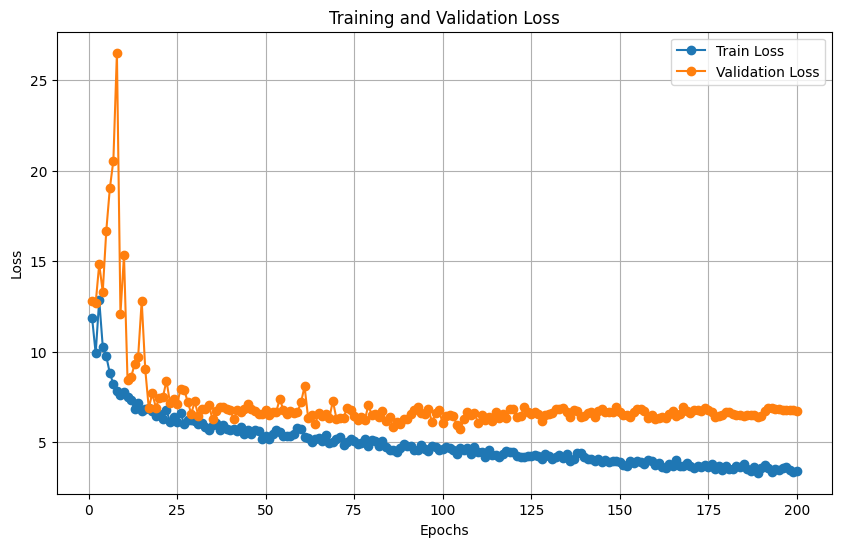

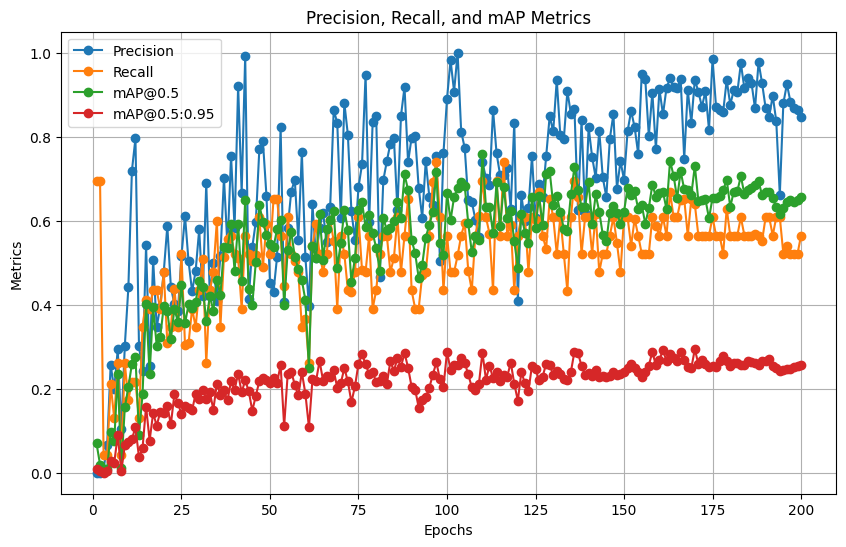

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the results.csv file
file_path = '/content/runs/detect/train/results.csv'
results_df = pd.read_csv(file_path)

# Plot training and validation losses
def plot_losses(results_df):
    epochs = results_df['epoch']
    train_loss = results_df['train/box_loss'] + results_df['train/cls_loss'] + results_df['train/dfl_loss']
    val_loss = results_df['val/box_loss'] + results_df['val/cls_loss'] + results_df['val/dfl_loss']

    plt.figure(figsize=(10, 6))
    plt.plot(epochs, train_loss, label='Train Loss', marker='o')
    plt.plot(epochs, val_loss, label='Validation Loss', marker='o')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()
    plt.show()

# Plot precision, recall, and mAP metrics
def plot_metrics(results_df):
    epochs = results_df['epoch']
    precision = results_df['metrics/precision(B)']
    recall = results_df['metrics/recall(B)']
    mAP50 = results_df['metrics/mAP50(B)']
    mAP50_95 = results_df['metrics/mAP50-95(B)']

    plt.figure(figsize=(10, 6))
    plt.plot(epochs, precision, label='Precision', marker='o')
    plt.plot(epochs, recall, label='Recall', marker='o')
    plt.plot(epochs, mAP50, label='mAP@0.5', marker='o')
    plt.plot(epochs, mAP50_95, label='mAP@0.5:0.95', marker='o')
    plt.title('Precision, Recall, and mAP Metrics')
    plt.xlabel('Epochs')
    plt.ylabel('Metrics')
    plt.legend()
    plt.grid()
    plt.show()

# Call the functions to plot results
plot_losses(results_df)
plot_metrics(results_df)

## **7. Run Inference**
Run inference on a test image:
- **YOLOv8**: Detects and predicts objects in the input image.
- **PyTorch**: Provides tensor operations and computational efficiency.

In [3]:
model = YOLO("/content/drive/MyDrive/yolov8_trained_model.pt")  # Load the trained model

In [8]:
from google.colab import files
# Upload an image
uploaded = files.upload()

# Assuming you upload only one file, get the file name
image_path = list(uploaded.keys())[0]
print(f"Image uploaded: {image_path}")

Saving damaged-5_avif.rf.aaa1aebdaefe8aaa3a7b0d2f989b95f0.jpg to damaged-5_avif.rf.aaa1aebdaefe8aaa3a7b0d2f989b95f0.jpg
Image uploaded: damaged-5_avif.rf.aaa1aebdaefe8aaa3a7b0d2f989b95f0.jpg



image 1/1 /content/damaged-5_avif.rf.aaa1aebdaefe8aaa3a7b0d2f989b95f0.jpg: 640x640 2 damages, 10.6ms
Speed: 1.8ms preprocess, 10.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


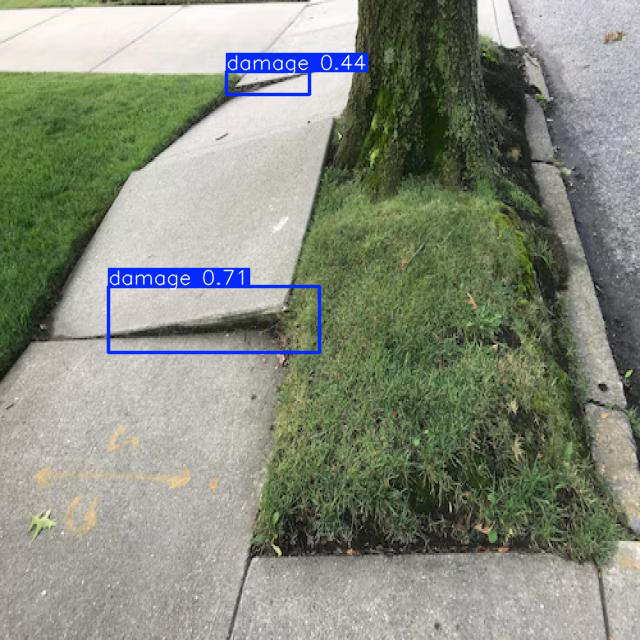

In [9]:
# Run inference on the uploaded image
results = model(image_path, iou = 0.5)

# Extract predictions (boxes, scores, labels)
predictions = results[0].boxes  # results[0] contains the boxes for the first image

# Display results (with the model's `show` method)
results[0].show()  # Automatically displays the image with bounding boxes and labels


## **8. Export the Model**
Export the trained model to a portable format:
- **Purpose**: Convert the model to a format suitable for deployment (e.g., TFLite).
- **YOLOv11**: Integrates PyTorch model export capabilities.

In [ ]:
model.export(format="tflite")